In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
CALIBRATION_FILE = '../calibration/out/C.mat'
MEASUREMENT_ROOT = './measurement_files/'
MEASUREMENT = "validation_2"
NANO_FILE = MEASUREMENT_ROOT + MEASUREMENT + ".csv"
TELEMETRY_FILE = MEASUREMENT_ROOT + MEASUREMENT + "_telemetry.txt"

In [3]:
nano_df = calibration.nanofile_to_dataframe(NANO_FILE)
telem_df = calibration.telemetry_to_dataframe(TELEMETRY_FILE)
C = scipy.io.loadmat(CALIBRATION_FILE)['C']
print nano_df.shape
print telem_df.shape
print C.shape

(372000, 7)
(20396, 9)
(24, 6)


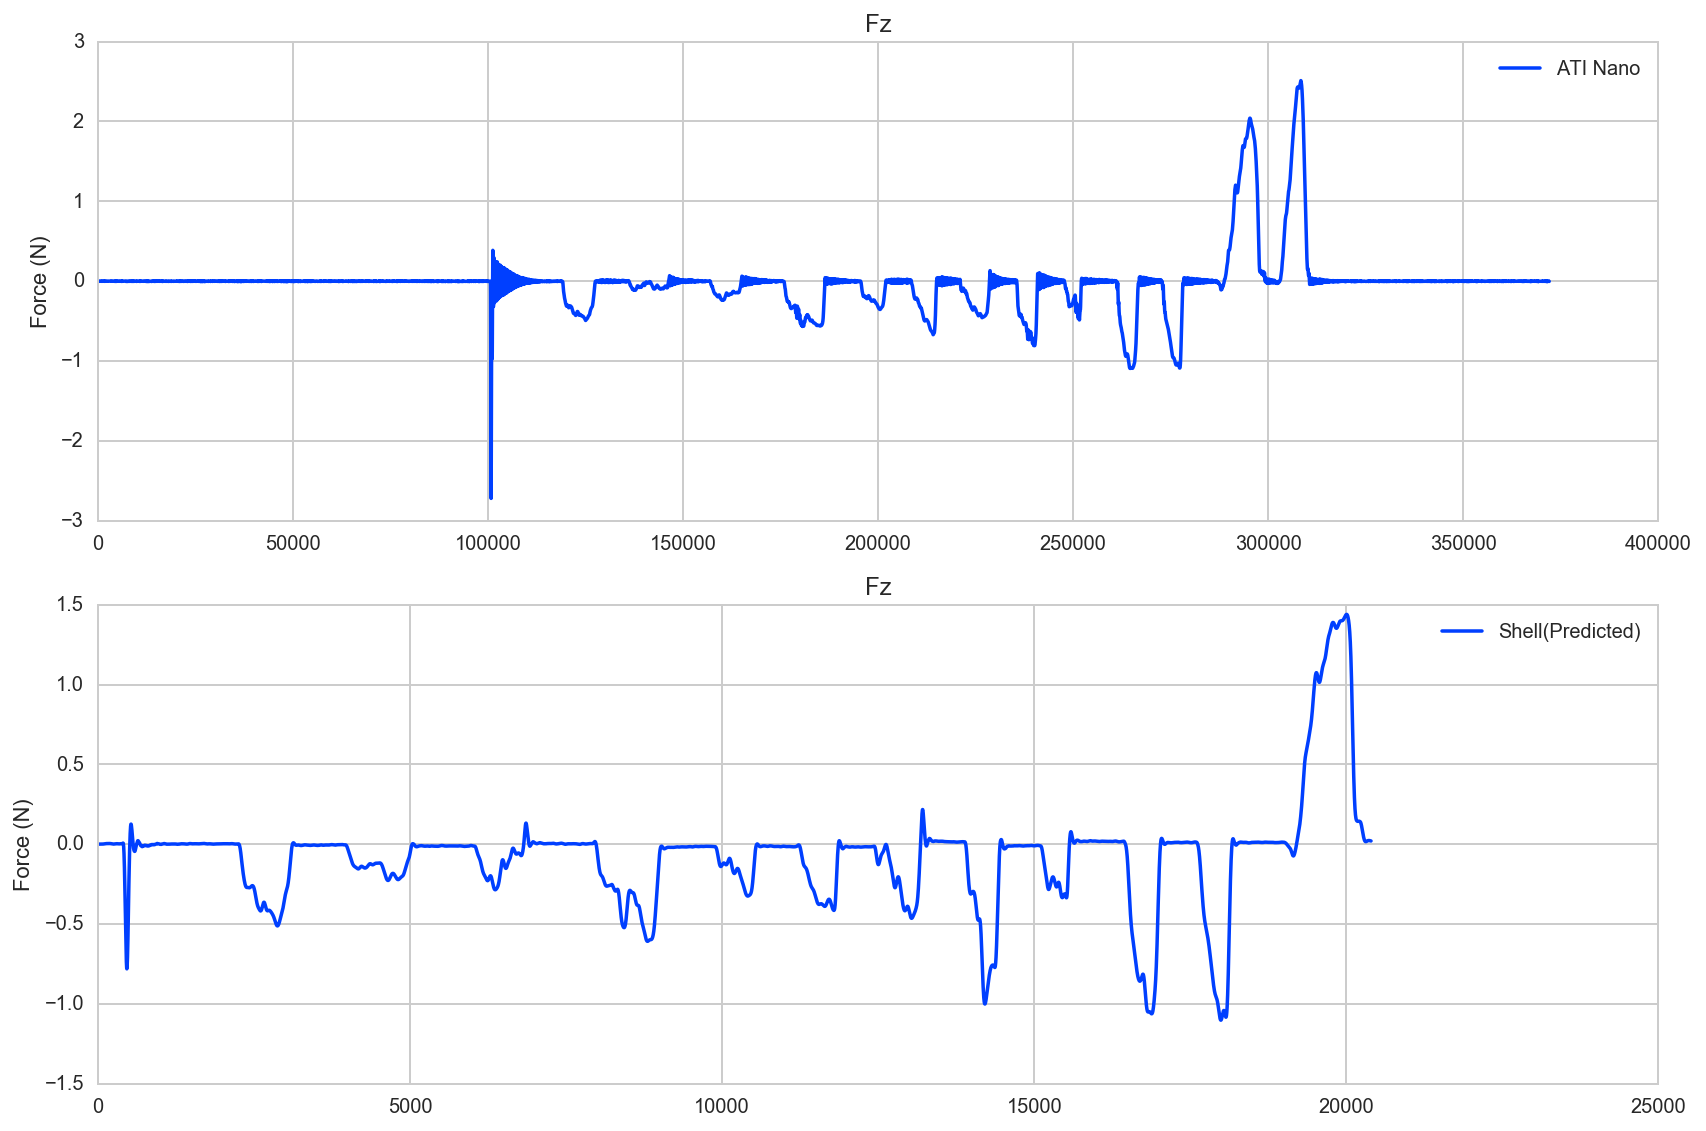

In [4]:
fig, ax = plt.subplots(2)
ax[0].plot(nano_df["Fz"], label="ATI Nano")
ax[0].set_title("Fz")
ax[0].set_ylabel("Force (N)")
ax[0].legend(loc='upper right')

ax[1].plot(utils.add_forces_moments(telem_df, C)["Fz"], label="Shell(Predicted)")
ax[1].set_ylabel("Force (N)")
ax[1].set_title("Fz")
ax[1].legend(loc='upper right')

fig.set_size_inches(12, 8)
plt.tight_layout()

plt.show()

In [5]:
FLICK_NANO_INDEX = nano_df["Fz"][:150000].apply(abs).argmax(axis=0)
FLICK_TELEM_INDEX = utils.add_forces_moments(telem_df, C)['Fz'][:5000].apply(abs).argmax(axis=0) # the flick index
print FLICK_NANO_INDEX
print FLICK_TELEM_INDEX

100785
464


In [6]:
M, S = calibration.align_two_streams(nano_df, telem_df, 10, 1, FLICK_NANO_INDEX, FLICK_TELEM_INDEX)
print M.shape
print S.shape

(19932, 6)
(19932, 8)


In [7]:
# C = calibration.least_squares_fit(M,S)

In [8]:
S_df = pd.DataFrame(S, columns=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])
shell_sensor_df = utils.add_forces_moments(S_df, C)
nano_sensor_df = pd.DataFrame(M, columns=["Fx", "Fy", "Fz", "Mx", "My", "Mz"])

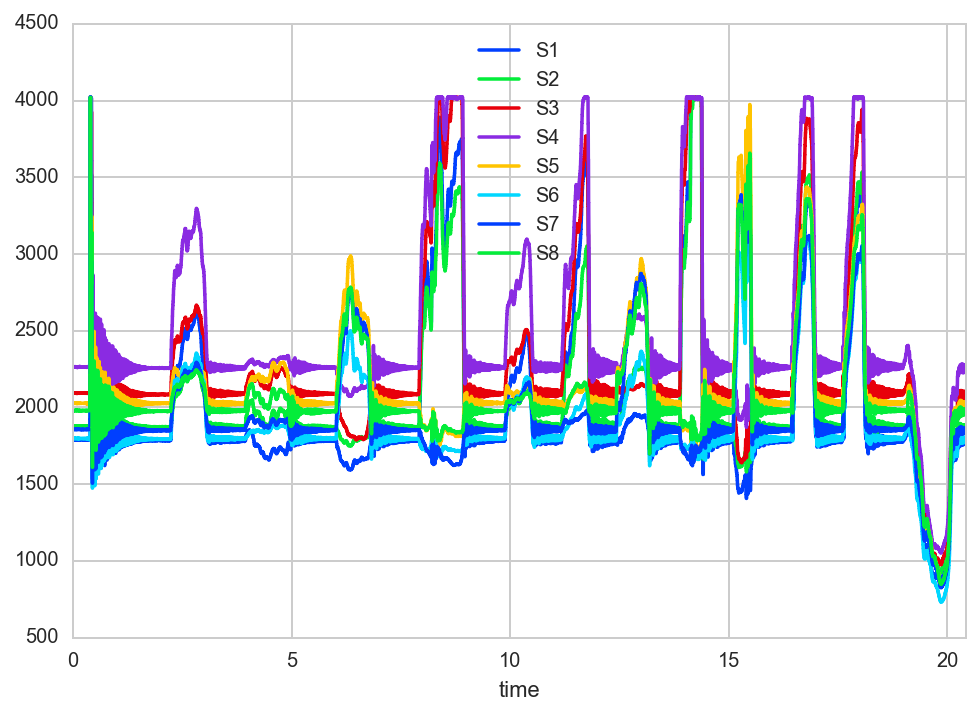

In [9]:
df = utils.process_data_files(TELEMETRY_FILE, CALIBRATION_FILE)
df.plot(x="time", y=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])

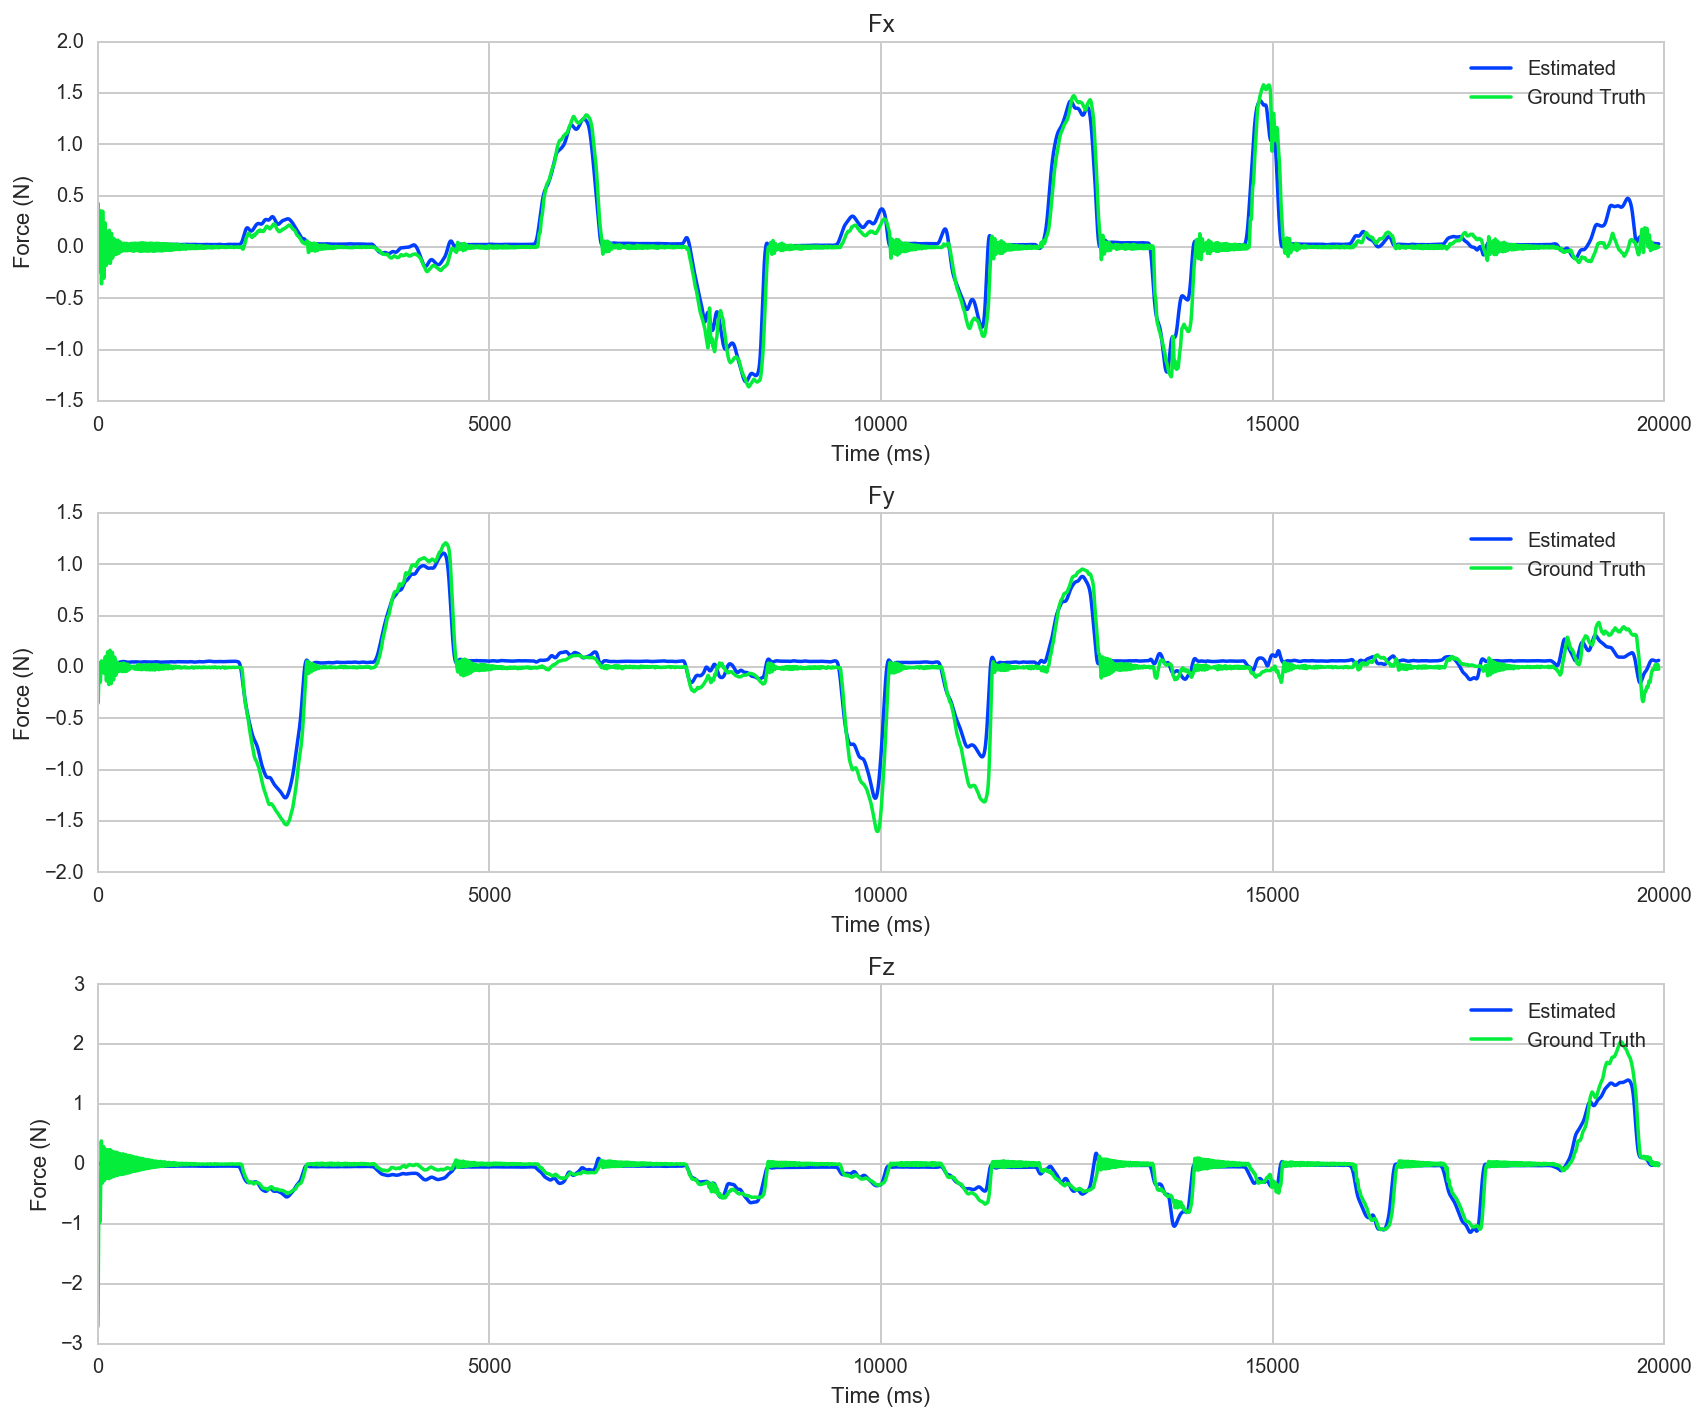

Saving image as out/force_error_plots.png
Image saved.


In [10]:
calibration.plot_force_error(shell_sensor_df, nano_sensor_df, save_figure=True)

In [11]:
loss = calibration.calculate_mse_error(shell_sensor_df, nano_sensor_df, columns=['Fx', 'Fy', 'Fz'])
print loss

Fx    0.014230
Fy    0.015100
Fz    0.016736
dtype: float64


In [27]:
# Median Percentage Error
columns = ['Fx', 'Fy', 'Fz']
diffX = (shell_sensor_df[columns[0]][5000:] - nano_sensor_df[columns[0]][5000:])
diffY = (shell_sensor_df[columns[1]][5000:] - nano_sensor_df[columns[1]][5000:])
diffZ = (shell_sensor_df[columns[2]][5000:] - nano_sensor_df[columns[2]][5000:])

print diffX.argmax()
print diffY.argmax()
print diffZ.argmax()

8503
11376
17676


In [12]:
print shell_sensor_df.shape
print nano_sensor_df.shape

(19932, 16)
(19932, 6)


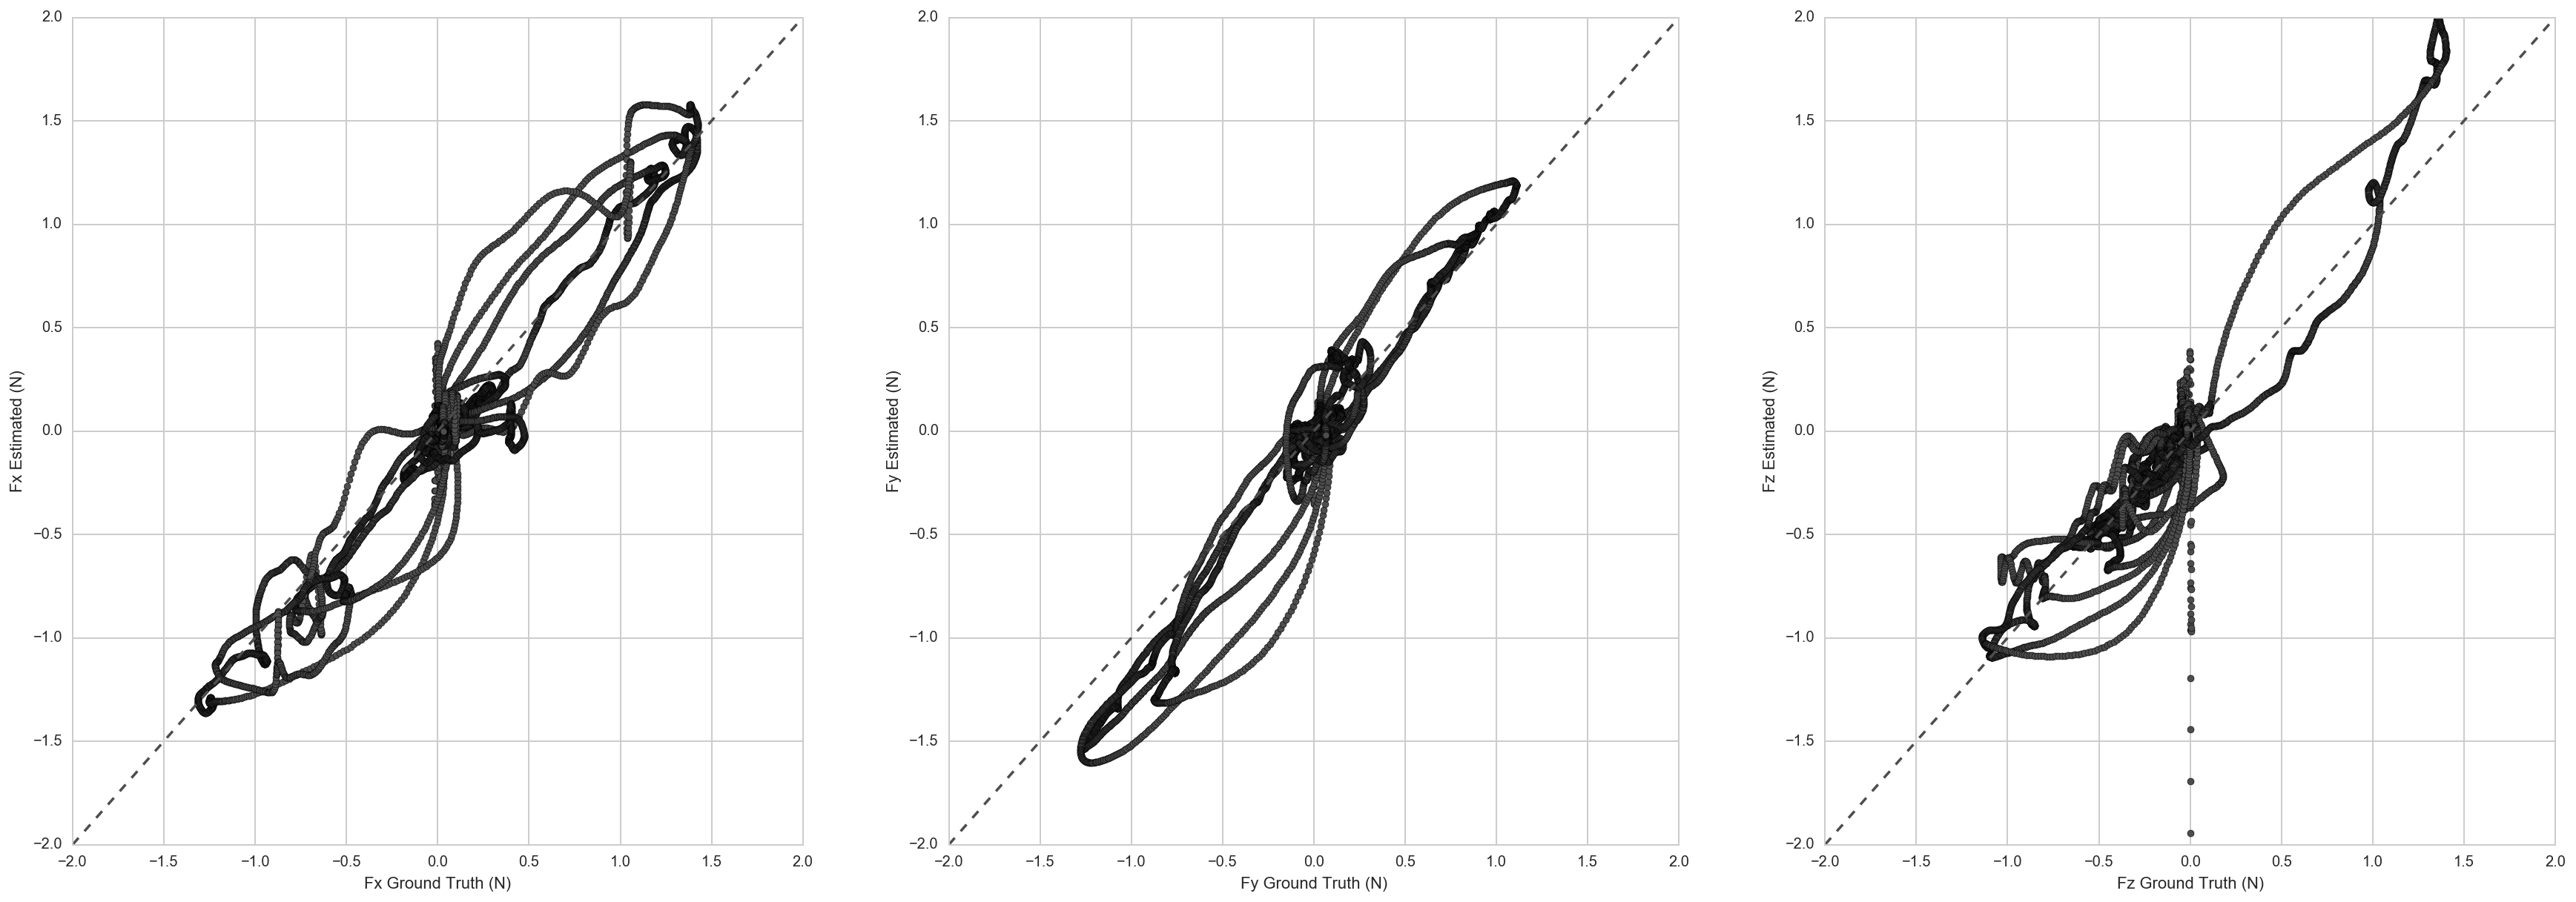

In [13]:
# fig, axarr = plt.subplots(3)
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.scatter(shell_sensor_df['Fx'], nano_sensor_df['Fx'], c=".3")
plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
# plt.set(xlim=(-2,2), ylim=(-2,2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.ylabel("Fx Estimated (N)")
plt.xlabel("Fx Ground Truth (N)")

plt.subplot(132)
plt.scatter(shell_sensor_df['Fy'], nano_sensor_df['Fy'], c=".3")
plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
# plt.set(xlim=(-2,2), ylim=(-2,2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.ylabel("Fy Estimated (N)")
plt.xlabel("Fy Ground Truth (N)")


plt.subplot(133)
plt.scatter(shell_sensor_df['Fz'], nano_sensor_df['Fz'], c=".3")
plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
# plt.set(xlim=(-2,2), ylim=(-2,2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.ylabel("Fz Estimated (N)")
plt.xlabel("Fz Ground Truth (N)")

plt.show()